# Anwendung von Klassifikationsalgorithmen auf den Pima Indians Diabetes Datensatz

In diesem Notebook führen wir folgende Schritte durch:
1. Datenimport und Überblick
2. Explorative Datenanalyse (EDA)
3. Datenvorverarbeitung (Fehlende Werte, Skalierung, Split)
4. Training von 4 Klassifikationsmodellen:
    - Logistische Regression
    - Support Vector Machine (SVM)
    - k-Nearest Neighbors (k-NN)
    - Multilayer Perceptron (Neurales Netz)
5. Evaluation und Vergleich der Modelle
6. Diskussion der Ergebnisse und mögliche nächste Schritte

Die folgen Fragen werden im Notebook beantwortet:
- Beschreibung der Struktur des Datensatzes (inkl. Besonderheiten bzgl. fehlender Daten, Histogramme, Scatterplots etc.) (a)
- Beschreibung der Datenvorverarbeitung (Umgang mit fehlenden Daten, Standardisierung, Mixing, Split) (b)
- Ergebnisse der Klassifikatoren, ggf. mit Visualisierung (Konfusionsmatrix, Scatterplots mit Entscheidungsgrenze) (c)
- Vergleich der Klassifikatoren anhand geeigneter Metriken (d)
- Diskussion der Ergebnisse und Einordnung der Praxistauglichkeit (e) 



## 1. Datenimport und Überblick 

**Context:**
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Content:**
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

[PIMA-Dataset](https://search.r-project.org/CRAN/refmans/pdp/html/pima.html)

In [1]:
# 0. Globale Einstellungen und Seeds für Reproduzierbarkeit
import numpy as np
np.random.seed(42) # Wichtig für Numpy-basierte Operationen, die Zufälligkeit beinhalten

In [2]:
# 1. Bibliotheken importieren
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Pfad zum Datensatz (anpassen, falls nötig)
# Stellen Sie sicher, dass die Datei 'diabetes.csv' im selben Verzeichnis wie das Notebook liegt
# oder geben Sie den korrekten Pfad an.
data_path = 'diabetes.csv'

# Daten laden
try:
    df = pd.read_csv(data_path)
except FileNotFoundError:
    print(f"FEHLER: Die Datei '{data_path}' wurde nicht gefunden. Bitte überprüfen Sie den Pfad.")
    # Hier könnten Sie exit() verwenden oder einen Dummy-DataFrame für Testzwecke erstellen,
    # aber für ein echtes Szenario ist es besser, hier abzubrechen oder den Nutzer zu informieren.
    exit()

In [3]:
# 2. Überblick und erste Analyse
print("Die ersten 5 Zeilen des Datensatzes:")
print(df.head())

Die ersten 5 Zeilen des Datensatzes:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
print("\nInformationen zu den Datentypen und fehlenden Werten (vor der Bereinigung):")
df.info()


Informationen zu den Datentypen und fehlenden Werten (vor der Bereinigung):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:

print("\nStatistische Zusammenfassung der numerischen Merkmale:")
print(df.describe())


Statistische Zusammenfassung der numerischen Merkmale:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.

## 2. Explorative Datenanalyse (EDA)
Visualisierung der Verteilungen und möglicher Zusammenhänge zwischen den Merkmalen und der Zielvariablen.


**a) Beschreibung der Struktur des Datensatzes**

Der Pima Indians Diabetes Datensatz, wie im Notebook geladen (***df = pd.read_csv(data_path)***), besteht aus 768 Beobachtungen (Patientinnen) und 9 Merkmalen. Die Merkmale sind:

- **Pregnancies:** Anzahl der Schwangerschaften

- **Glucose:** Plasmaglukosekonzentration nach 2 Stunden in einem oralen Glukosetoleranztest

- **BloodPressure:** Diastolischer Blutdruck (mm Hg)

- **SkinThickness:** Dicke der Trizepshautfalte (mm)

- **Insulin:** 2-Stunden-Serum-Insulin (mu U/ml)

- **BMI:** Body-Mass-Index (Gewicht in kg/(Größe in m)^2)

- **DiabetesPedigreeFunction:** Diabetes-Abstammungsfunktion (ein Wert, der die Diabetes-Wahrscheinlichkeit basierend auf der Familienanamnese quantifiziert)

- **Age:** Alter (Jahre)

- **Outcome:** Die Zielvariable, die angibt, ob eine Patientin Diabetes hat (1) oder nicht (0).

Die Datentypen sind überwiegend numerisch (*Integer* und *Float*), wie *df.info()* zeigt.


**Besonderheiten bzgl. fehlender Daten:**
Eine wichtige Besonderheit dieses Datensatzes ist, dass fehlende Werte oft nicht als ***NaN*** (Not a Number) kodiert sind, sondern als Nullen in bestimmten Spalten, wo ein physiologischer Wert von Null unplausibel ist. Im Notebook wurden die Spalten Glucose, BloodPressure, SkinThickness, Insulin und BMI identifiziert, bei denen Nullen als fehlende Werte interpretiert und durch NaN ersetzt wurden (***df[col].replace(0, np.nan)***). Die Anzahl dieser unplausiblen Nullen wurde vor der Ersetzung für jede betroffene Spalte ausgegeben.


**Histogramme:**
Die generierten Histogramme (*df.hist()*) zeigen die Verteilung jedes Merkmals. Daraus lassen sich erste Eindrücke über die Form der Verteilung (z.B. *schief* oder *symmetrisch*), den Wertebereich und mögliche Ausreißer gewinnen. Beispielsweise könnten Merkmale wie Insulin oder DiabetesPedigreeFunction rechtsschiefe Verteilungen aufweisen.


**Korrelationsmatrix:**
Die Heatmap der Korrelationsmatrix (***sns.heatmap(df.corr(), annot=True)***) zeigt die linearen Korrelationskoeffizienten zwischen allen Merkmalspaaren. Starke positive oder negative Korrelationen können auf Multikollinearität hinweisen oder Merkmale identifizieren, die stark mit der Zielvariablen zusammenhängen (obwohl dies hier nicht im Fokus der direkten Korrelation mit Outcome steht, sondern eher zwischen den Features selbst).


**Boxplots:**
Die Boxplots für jedes Merkmal, gruppiert nach Outcome (***sns.boxplot(x='Outcome', y=col, data=df_for_boxplot)***), stellen die Verteilungen (Median, Quartile, Ausreißer) der einzelnen Merkmale für Patientinnen mit und ohne Diabetes gegenüber. Sie machen Unterschiede in den zentralen Tendenzen und der Streuung zwischen den beiden Gruppen deutlich. Zum Beispiel ist oft zu sehen, dass der Medianwert für Glucose bei Patientinnen mit Diabetes (Outcome=1) höher ist.


**Scatterplots (Pairplot):**
Der ***sns.pairplot(df, hue='Outcome')*** visualisiert die bivariaten Beziehungen zwischen allen Merkmalspaaren, wobei die Punkte nach der Zielvariablen Outcome eingefärbt sind. Dies hilft zu erkennen, ob es zwischen bestimmten Merkmalspaaren sichtbare Trennungen oder Überlappungen der beiden Klassen gibt. Es kann auch auf Korrelationen zwischen Merkmalen hinweisen.



Histogramme der Merkmale:


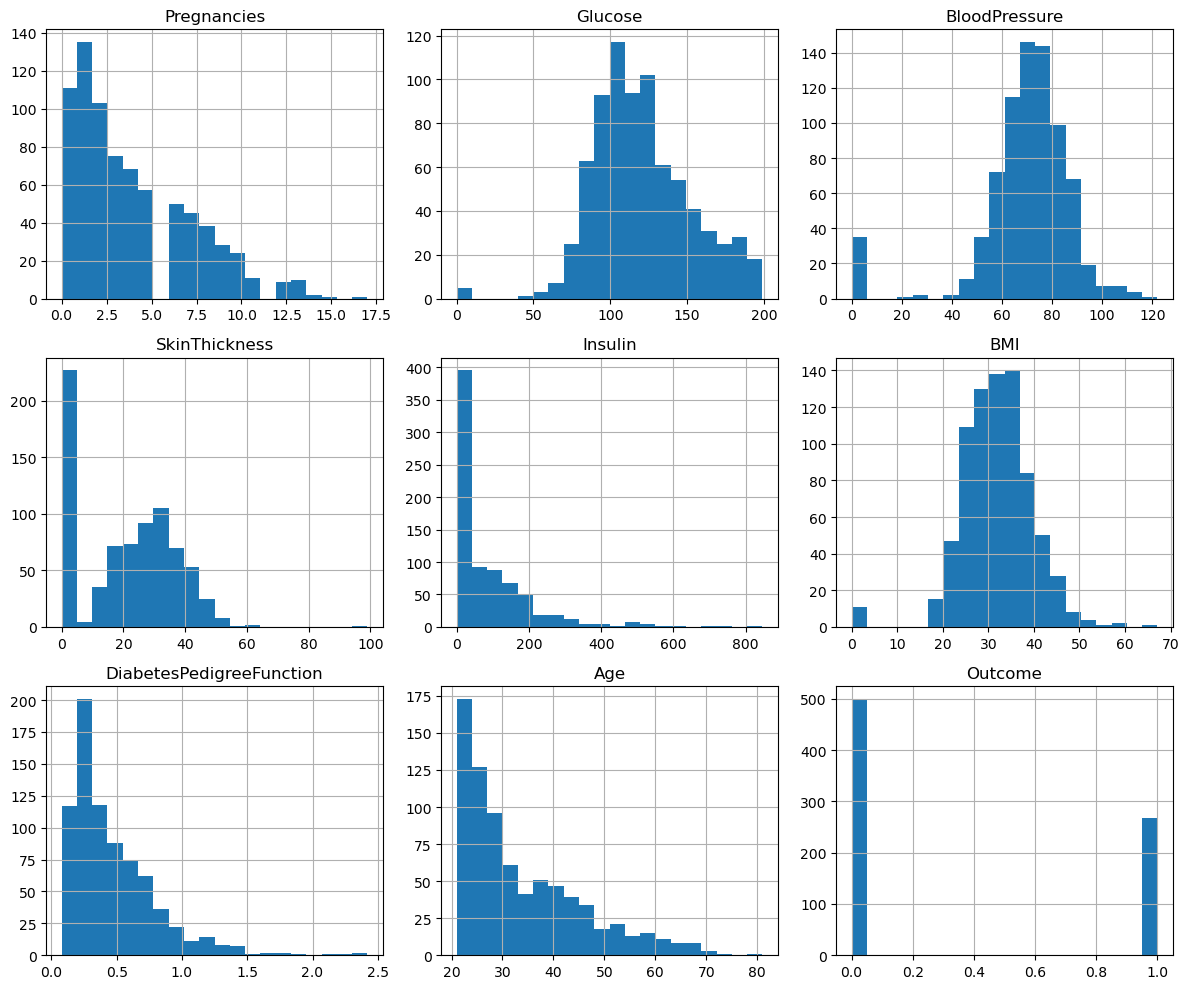

In [6]:
# Histogramme der Merkmale, um ihre Verteilung zu verstehen
print("\nHistogramme der Merkmale:")
df.hist(figsize=(12, 10), bins=20) # bins hinzugefügt für detailliertere Histogramme
plt.tight_layout() # Verbessert das Layout, um Überlappungen zu vermeiden
plt.show()


Korrelationsmatrix:


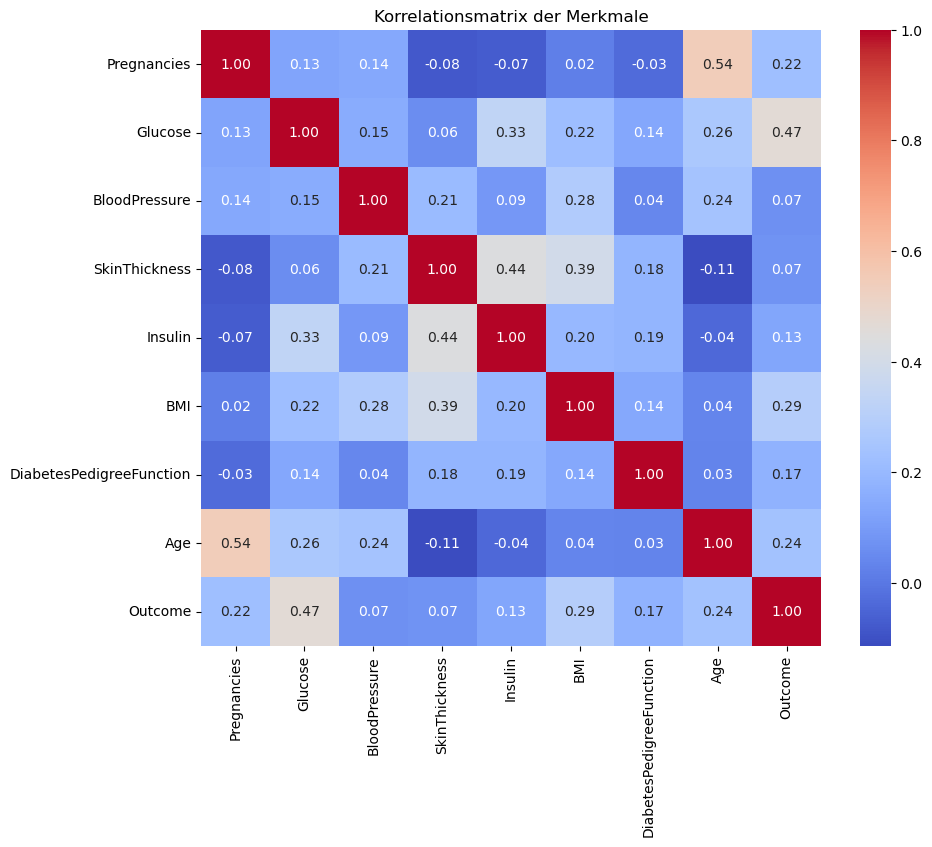

In [7]:
# Korrelationsmatrix, um lineare Beziehungen zwischen Merkmalen zu sehen
print("\nKorrelationsmatrix:")
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelationsmatrix der Merkmale')
plt.show()

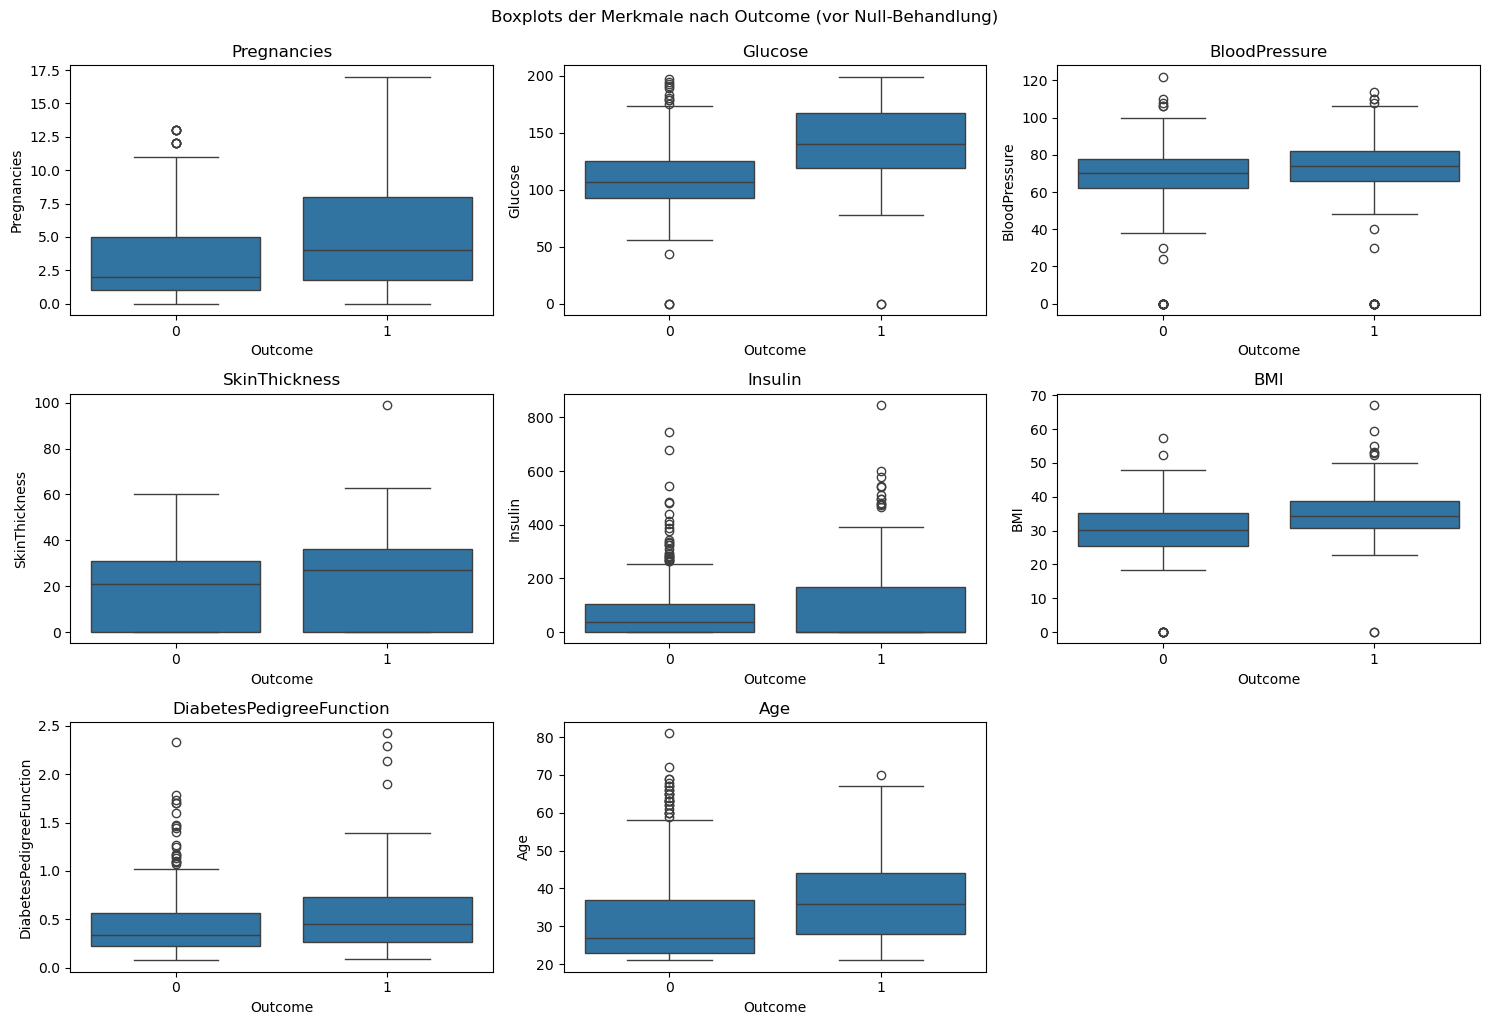

In [8]:
# Boxplots für jedes Merkmal, gruppiert nach 'Outcome', um Unterschiede zu sehen
# Wir erstellen eine Kopie, um die Originaldaten nicht zu verändern, bevor Nullen behandelt werden
df_for_boxplot = df.copy()
# Nur numerische Features ohne 'Outcome' für die Boxplots
features_for_boxplot = df_for_boxplot.drop('Outcome', axis=1).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(features_for_boxplot):
    plt.subplot(3, 3, i + 1) # Annahme: 8 Features -> 3x3 Grid passt
    sns.boxplot(x='Outcome', y=col, data=df_for_boxplot)
    plt.title(col)
plt.tight_layout()
plt.suptitle('Boxplots der Merkmale nach Outcome (vor Null-Behandlung)', y=1.02)
plt.show()



Pairplot der Merkmale (gefärbt nach Outcome):


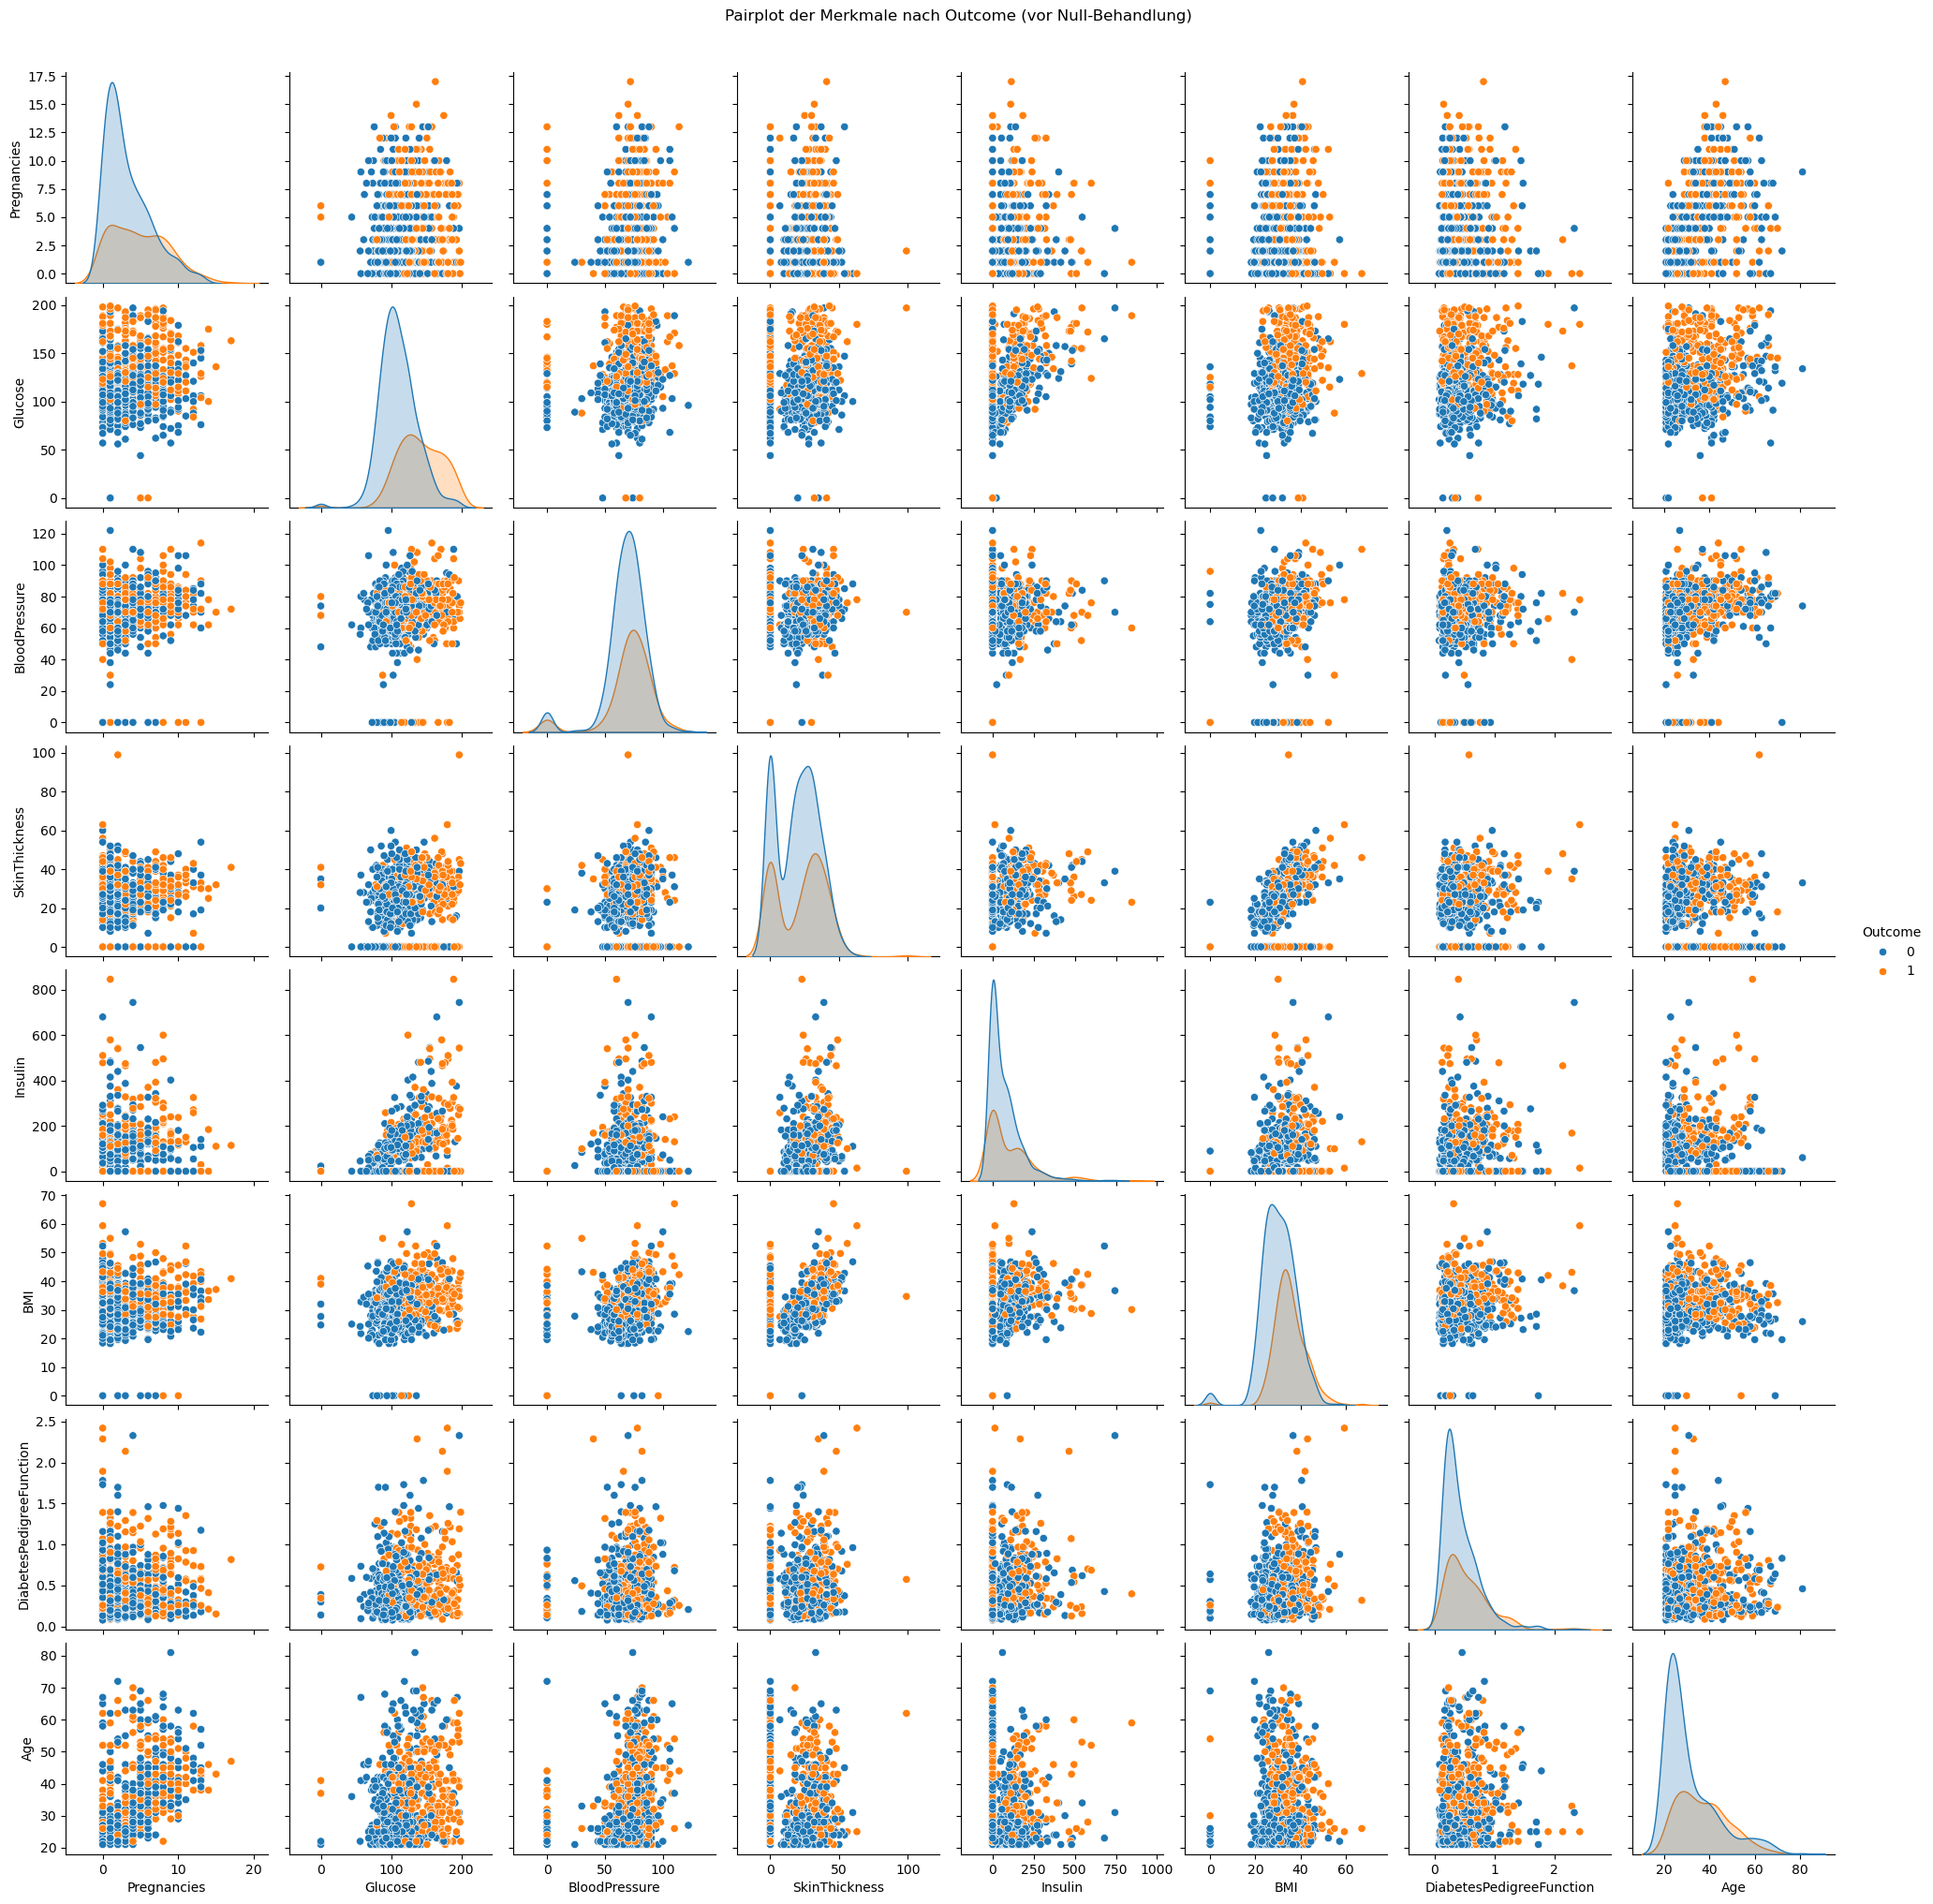

In [9]:
# Scatterplot ausgewählter Merkmale vs. Outcome
# pairplot kann bei vielen Merkmalen unübersichtlich und rechenintensiv werden.
# Es ist nützlich, um bivariate Beziehungen zu sehen.
print("\nPairplot der Merkmale (gefärbt nach Outcome):")
# Wir nehmen eine kleinere Auswahl für den Pairplot oder eine Sample, falls der Datensatz sehr groß ist.
# sns.pairplot(df, hue='Outcome', vars=['Glucose', 'BMI', 'Age', 'Insulin']) # Beispiel mit ausgewählten Variablen
sns.pairplot(df, hue='Outcome') # Für den PIMA Datensatz ist der volle Pairplot noch handhabbar
plt.suptitle('Pairplot der Merkmale nach Outcome (vor Null-Behandlung)', y=1.02)
plt.show()

## 3. Datenvorverarbeitung

- **Umgang mit unplausiblen Nullwerten:** In medizinischen Datensätzen können Nullen oft fehlende oder nicht gemessene Werte bedeuten, anstatt tatsächliche Nullwerte (z.B. Blutdruck 0). Diese werden durch `NaN` ersetzt.
- **Imputation fehlender Werte:** Die `NaN`-Werte werden durch den Median der jeweiligen Spalte ersetzt. Der Median ist oft robuster gegenüber Ausreißern als der Mittelwert.
- **Standardisierung der Merkmale:** Merkmale werden auf eine ähnliche Skala gebracht (Mittelwert 0, Standardabweichung 1). Dies ist wichtig für Algorithmen wie SVM und k-NN, die auf Distanzmessungen basieren, sowie für die Konvergenz von Neuronalen Netzen und Logistischer Regression.
- **Aufteilung in Trainings- und Testset:** Der Datensatz wird in ein Trainingsset (zum Trainieren der Modelle) und ein Testset (zur Evaluation der Modelle auf ungesehenen Daten) aufgeteilt. `stratify=Y` stellt sicher, dass das Verhältnis der Klassen (`Outcome`) in beiden Sets ähnlich ist.

**b) Beschreibung der Datenvorverarbeitung**

Die Datenvorverarbeitung im Notebook umfasst mehrere wichtige Schritte:

**Umgang mit fehlenden Daten:**

Identifikation und Ersetzung unplausibler Nullen: Wie unter a) beschrieben, wurden Nullen in den Spalten *Glucose*, *BloodPressure*, *SkinThickness*, *Insulin* und *BMI* als fehlende Werte interpretiert und durch *np.nan* ersetzt.

**Imputation:** Die entstandenen *NaN-Werte* wurden anschließend durch den Median der jeweiligen Spalte imputiert (***df[col] = df[col].fillna(median_val)***). Der Median wurde gewählt, da er robuster gegenüber Ausreißern ist als der Mittelwert, was bei einigen der schief verteilten Merkmale vorteilhaft sein kann. Diese Imputation erfolgte vor dem Aufteilen der Daten. Für eine strengere methodische Vorgehensweise sollte die Imputation nach dem Split auf dem Trainingsset gelernt und dann auf das Testset angewendet werden, um Informationsleckagen (Data Leakage) zu vermeiden. Im Notebook wurde dies der Einfachheit halber vor dem Split gemacht.

**Standardisierung:**

Die Merkmale (**X**) wurden mit dem StandardScaler standardisiert (***X_scaled = scaler.fit_transform(X)***). Dieser Prozess transformiert die Daten so, dass sie einen Mittelwert von 0 und eine Standardabweichung von 1 haben.

Dies ist ein wichtiger Schritt, da viele Klassifikationsalgorithmen (wie SVM, k-NN und auch die Optimierungsalgorithmen für Logistische Regression und Neuronale Netze) empfindlich auf die Skalierung der Eingabemerkmale reagieren oder davon profitieren. Merkmale mit größeren Wertebereichen könnten sonst die Ergebnisse unverhältnismäßig stark beeinflussen.

**Mixing (Mischen/Shuffle):**

Die Funktion train_test_split mischt die Daten standardmäßig (***shuffle=True***), bevor sie in Trainings- und Testsets aufgeteilt werden. Dies stellt sicher, dass die Daten zufällig verteilt sind und keine systematische Ordnung die Aufteilung beeinflusst.

**Split (Aufteilung in Trainings- und Testset):**

Der Datensatz wurde in ein Trainingsset (80% der Daten) und ein Testset (20% der Daten) aufgeteilt (***test_size=0.2***).

***random_state=42*** wurde verwendet, um sicherzustellen, dass die Aufteilung reproduzierbar ist. Bei jedem Lauf mit demselben random_state ergibt sich die gleiche Aufteilung.

***stratify=Y*** wurde gesetzt. Dies ist ein sehr wichtiger Parameter bei Klassifikationsaufgaben, da er dafür sorgt, dass das Verhältnis der Klassen (hier Outcome 0 und 1) im Trainings- und Testset dem Verhältnis im ursprünglichen Datensatz entspricht. Dies ist besonders relevant, wenn die Klassen unausgewogen sind, um sicherzustellen, dass beide Sets repräsentativ sind.

In [10]:
# Spalten, in denen Nullwerte physiologisch unplausibel sind und eher fehlende Werte darstellen
cols_to_replace_zero_with_nan = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print(f"\nAnzahl der Nullwerte VOR Ersetzung in {cols_to_replace_zero_with_nan}:")
for col in cols_to_replace_zero_with_nan:
    print(f"{col}: {df[df[col] == 0].shape[0]}")


Anzahl der Nullwerte VOR Ersetzung in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11


In [11]:
# Ersetzen von 0-Werten durch NaN in den ausgewählten Spalten
for col in cols_to_replace_zero_with_nan:
    df[col] = df[col].replace(0, np.nan)

print("\nFehlende Werte pro Spalte NACH Ersetzung von 0 durch NaN:")
print(df.isna().sum())



Fehlende Werte pro Spalte NACH Ersetzung von 0 durch NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [12]:
# Imputation fehlender Werte mit dem Median
# Der Median wird auf dem DataFrame *bevor* dem Split berechnet, um Data Leakage zu vermeiden,
# aber idealerweise sollte Imputation nach dem Split auf dem Trainingsset gelernt und auf Testset angewendet werden.
# Für Einfachheit hier vor dem Split, aber für rigorose Studien nach dem Split anpassen.
for col in df.columns: # Iteriere über alle Spalten
    if df[col].isna().any(): # Nur wenn es NaNs in der Spalte gibt
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"Fehlende Werte in '{col}' mit Median ({median_val:.2f}) imputiert.")


print("\nFehlende Werte pro Spalte NACH Imputation:")
print(df.isna().sum()) # Sollte jetzt überall 0 sein

Fehlende Werte in 'Glucose' mit Median (117.00) imputiert.
Fehlende Werte in 'BloodPressure' mit Median (72.00) imputiert.
Fehlende Werte in 'SkinThickness' mit Median (29.00) imputiert.
Fehlende Werte in 'Insulin' mit Median (125.00) imputiert.
Fehlende Werte in 'BMI' mit Median (32.30) imputiert.

Fehlende Werte pro Spalte NACH Imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [13]:
# Merkmale (X) und Zielvariable (Y) definieren
X = df.drop('Outcome', axis=1)
Y = df['Outcome']

# Skalierung der Merkmale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # scaler lernt (fit) und transformiert X
# X_scaled ist jetzt ein NumPy-Array. Für spätere Analysen ggf. wieder in DataFrame umwandeln:
# X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Aufteilen in Trainings- und Testset
# test_size=0.2 bedeutet 20% der Daten für das Testset
# random_state=42 sorgt für reproduzierbare Aufteilungen
# stratify=Y ist wichtig bei Klassifikationsproblemen, um die Klassenproportionen beizubehalten
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=42, stratify=Y
)

print(f"\nForm des Trainingsdatensatzes (X_train): {X_train.shape}")
print(f"Form des Testdatensatzes (X_test): {X_test.shape}")
print(f"Verteilung der Klassen im Trainingsset (y_train):\n{y_train.value_counts(normalize=True)}")
print(f"Verteilung der Klassen im Testset (y_test):\n{y_test.value_counts(normalize=True)}")



Form des Trainingsdatensatzes (X_train): (614, 8)
Form des Testdatensatzes (X_test): (154, 8)
Verteilung der Klassen im Trainingsset (y_train):
Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64
Verteilung der Klassen im Testset (y_test):
Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64


## 4. Modelle trainieren
Initialisierung und Training der vier ausgewählten Klassifikationsmodelle mit den Trainingsdaten.
`random_state` wird für Modelle mit stochastischen Elementen gesetzt, um reproduzierbare Ergebnisse zu erhalten.

In [14]:
# Initialisierung der Modelle
# 4.1 Logistische Regression
# max_iter wurde erhöht, um Konvergenzprobleme bei einigen Datensätzen zu vermeiden.
lr_model = LogisticRegression(max_iter=1000, random_state=42)


In [15]:
# 4.2 Support Vector Machine (SVM)
# kernel='rbf' ist ein gängiger Kernel für nicht-lineare Probleme.
# probability=True wird benötigt, wenn man Wahrscheinlichkeiten für Vorhersagen erhalten möchte (langsamer).
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

In [16]:
# 4.3 k-Nearest Neighbors (k-NN)
# n_neighbors=5 ist ein üblicher Startwert, kann aber optimiert werden (Hyperparameter-Tuning).
knn_model = KNeighborsClassifier(n_neighbors=5) # k-NN ist deterministisch für fit/predict, kein random_state direkt nötig,
                                               # es sei denn, der Algorithmus selbst hätte stochastische Teile (selten für Standard-kNN).

In [17]:
# 4.4 Neuronales Netz (Multilayer Perceptron - MLP)
# hidden_layer_sizes: Definiert die Architektur des Netzes (z.B. (50, 30) -> zwei Schichten mit 50 bzw. 30 Neuronen).
# max_iter: Maximale Anzahl von Iterationen (Epochen). Erhöht, um Konvergenz zu unterstützen.
# activation: Aktivierungsfunktion für die Hidden Layer. 'relu' ist Standard.
# solver: Algorithmus für die Gewichtoptimierung. 'adam' ist oft eine gute Wahl.
# random_state: Für reproduzierbare Gewichtinitialisierungen.
# early_stopping: Aktiviert, um das Training zu stoppen, wenn sich die Validierungsleistung nicht verbessert.
# n_iter_no_change: Anzahl der Iterationen ohne Verbesserung, nach denen das Training gestoppt wird (wenn early_stopping=True).
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 30), 
                          max_iter=1000,  # Erhöht von 500
                          activation='relu',
                          solver='adam', 
                          random_state=42, 
                          early_stopping=True, # Aktiviert
                          n_iter_no_change=10, # Standardwert, kann angepasst werden
                          validation_fraction=0.1 # Standardwert, Anteil der Trainingsdaten für Validierung
                         )


In [18]:
# Dictionary für einfaches Iterieren über die Modelle
models = {
    'Logistische Regression': lr_model,
    'SVM': svm_model,
    'k-NN': knn_model,
    'MLP': mlp_model
}

In [19]:
# Training der Modelle
for name, model in models.items():
    print(f"Training des Modells: {name}...")
    model.fit(X_train, y_train)
    print(f"{name} trainiert.") 

Training des Modells: Logistische Regression...
Logistische Regression trainiert.
Training des Modells: SVM...
SVM trainiert.
Training des Modells: k-NN...
k-NN trainiert.
Training des Modells: MLP...
MLP trainiert.


## 5. Evaluation der Modelle
Für jedes trainierte Modell werden Vorhersagen auf dem Testset gemacht.
Anschließend werden gängige Metriken (Precision, Recall, F1-Score, Accuracy) und die Konfusionsmatrix berechnet und dargestellt.

**c) Ergebnisse der Klassifikatoren, ggf. mit Visualisierung**

Für jeden der vier trainierten Klassifikatoren (**Logistische Regression, SVM, k-NN, MLP**) wurden die folgenden Ergebnisse und Visualisierungen im Notebook generiert:

1. **Klassifikationsbericht (classification_report):**
    - Dieser Bericht liefert für jede Klasse (Kein Diabetes (0) und Diabetes (1)) sowie aggregiert die Metriken:
        - **Precision:** Der Anteil der korrekt positiven Vorhersagen an allen positiven Vorhersagen für eine Klasse.
        - **Recall (Sensitivität):** Der Anteil der korrekt positiven Vorhersagen an allen tatsächlichen positiven Fällen einer Klasse.
        - **F1-Score:** Das harmonische Mittel von Precision und Recall, ein guter Kompromiss zwischen beiden.
        - **Support:** Die Anzahl der tatsächlichen Instanzen jeder Klasse im Testset.
    - Zusätzlich wird die **Accuracy** (Gesamtgenauigkeit) über alle Klassen hinweg angegeben.
2. **Visualisierung mit Konfusionsmatrix (ConfusionMatrixDisplay):**
    - Für jeden Klassifikator wurde eine Konfusionsmatrix erstellt und visualisiert. Diese Matrix zeigt eine tabellarische Darstellung der Vorhersageleistung:
        - **True Positives (TP):** Anzahl der Diabetes-Fälle, die korrekt als Diabetes klassifiziert wurden.
        - **True Negatives (TN):** Anzahl der Nicht-Diabetes-Fälle, die korrekt als Nicht-Diabetes klassifiziert wurden.
        - **False Positives (FP) / Typ-I-Fehler:** Anzahl der Nicht-Diabetes-Fälle, die fälschlicherweise als Diabetes klassifiziert wurden.
        - **False Negatives (FN) / Typ-II-Fehler:** Anzahl der Diabetes-Fälle, die fälschlicherweise als Nicht-Diabetes klassifiziert wurden.
    - Die Konfusionsmatrix gibt einen detaillierten Einblick, welche Arten von Fehlern die Modelle machen.

**Scatterplots mit Entscheidungsgrenze:**
Das aktuelle Notebook enthält keine explizite Visualisierung von Entscheidungsgrenzen in Scatterplots. Die Visualisierung von Entscheidungsgrenzen ist bei mehr als zwei Merkmalen komplex (da der Merkmalsraum höherdimensional ist) und erfordert oft eine Reduktion auf zwei Dimensionen (z.B. mittels PCA oder durch Auswahl zweier Merkmale) oder spezialisierte Plot-Techniken. Für nicht-lineare Modelle wie SVM mit RBF-Kernel oder Neuronale Netze können die Entscheidungsgrenzen zudem sehr komplex sein. Der Fokus der Evaluation im Notebook liegt auf den numerischen Metriken und den Konfusionsmatrizen.


--- Evaluation: Logistische Regression ---

Klassifikationsbericht:
                   precision    recall  f1-score   support

Kein Diabetes (0)       0.75      0.81      0.78       100
     Diabetes (1)       0.59      0.50      0.54        54

         accuracy                           0.70       154
        macro avg       0.67      0.66      0.66       154
     weighted avg       0.69      0.70      0.70       154


Konfusionsmatrix:


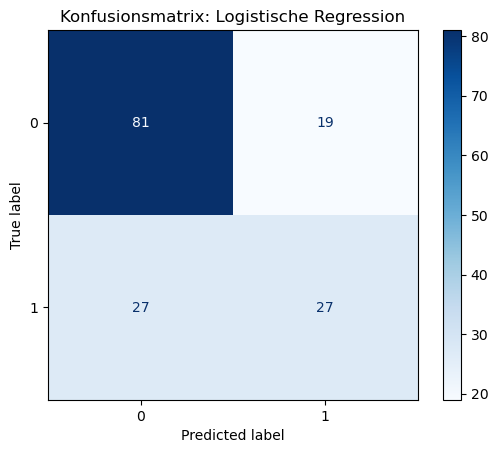


--- Evaluation: SVM ---

Klassifikationsbericht:
                   precision    recall  f1-score   support

Kein Diabetes (0)       0.77      0.84      0.80       100
     Diabetes (1)       0.64      0.54      0.59        54

         accuracy                           0.73       154
        macro avg       0.71      0.69      0.69       154
     weighted avg       0.73      0.73      0.73       154


Konfusionsmatrix:


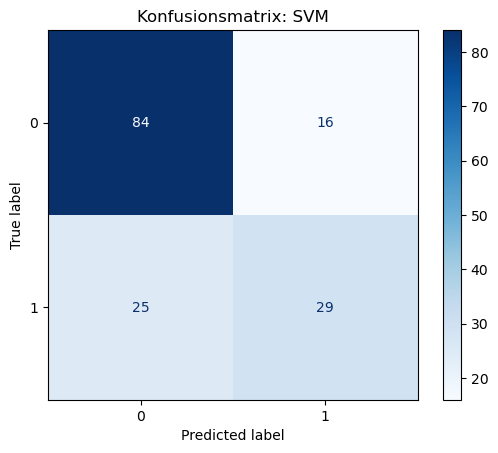


--- Evaluation: k-NN ---

Klassifikationsbericht:
                   precision    recall  f1-score   support

Kein Diabetes (0)       0.80      0.83      0.81       100
     Diabetes (1)       0.66      0.61      0.63        54

         accuracy                           0.75       154
        macro avg       0.73      0.72      0.72       154
     weighted avg       0.75      0.75      0.75       154


Konfusionsmatrix:


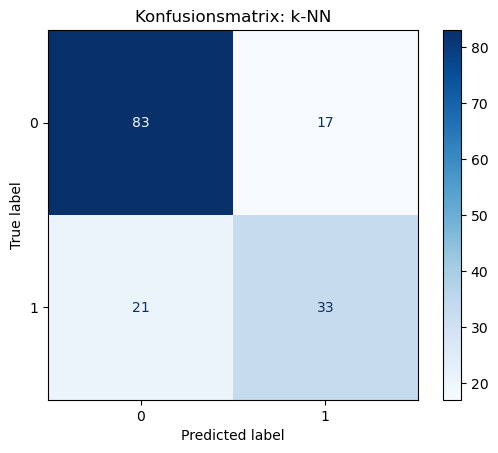


--- Evaluation: MLP ---

Klassifikationsbericht:
                   precision    recall  f1-score   support

Kein Diabetes (0)       0.79      0.79      0.79       100
     Diabetes (1)       0.61      0.61      0.61        54

         accuracy                           0.73       154
        macro avg       0.70      0.70      0.70       154
     weighted avg       0.73      0.73      0.73       154


Konfusionsmatrix:


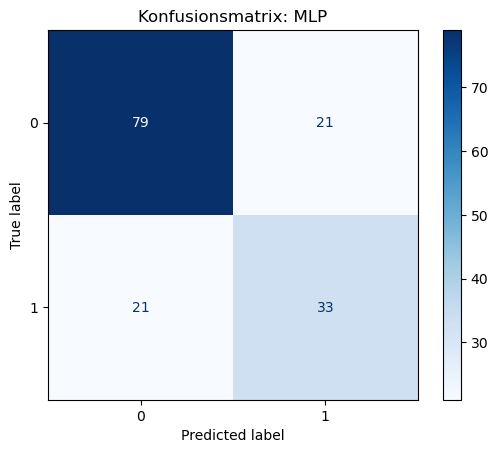

In [20]:
# Evaluation jedes Modells
evaluation_results = {}
target_names_for_report = ['Kein Diabetes (0)', 'Diabetes (1)'] # Definiere die Namen einmal

for name, model in models.items():
    print(f"\n--- Evaluation: {name} ---")
    
    # Vorhersagen auf dem Testset
    y_pred = model.predict(X_test)
    
    print("\nKlassifikationsbericht:")
    # Verwende target_names_for_report für den gedruckten Bericht
    report = classification_report(y_test, y_pred, target_names=target_names_for_report, zero_division=0)
    print(report)
    
    # Speichern der Metriken für späteren Vergleich
    # WICHTIG: Verwende target_names_for_report auch hier, damit die Schlüssel im Dictionary übereinstimmen!
    report_dict = classification_report(y_test, y_pred, target_names=target_names_for_report, output_dict=True, zero_division=0) 
    
    evaluation_results[name] = {
        'accuracy': report_dict['accuracy'],
        # Greife auf die Metriken mit den definierten Namen zu
        'precision_1': report_dict['Diabetes (1)']['precision'], 
        'recall_1': report_dict['Diabetes (1)']['recall'],       
        'f1_score_1': report_dict['Diabetes (1)']['f1-score']    
    }
    
    print("\nKonfusionsmatrix:")
    cm = confusion_matrix(y_test, y_pred)
    # Für ConfusionMatrixDisplay können wir model.classes_ verwenden, wenn es die ursprünglichen Labels (0,1) sind
    # oder target_names_for_report, wenn wir die Namen dort sehen wollen. model.classes_ ist oft robuster.
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_) 
    disp.plot(cmap=plt.cm.Blues) 
    plt.title(f"Konfusionsmatrix: {name}")
    plt.show()


--- Zusammenfassender Vergleich (Metriken für Klasse 'Diabetes (1)') ---
                        f1_score_1  accuracy  precision_1  recall_1
k-NN                      0.634615  0.753247     0.660000  0.611111
MLP                       0.611111  0.727273     0.611111  0.611111
SVM                       0.585859  0.733766     0.644444  0.537037
Logistische Regression    0.540000  0.701299     0.586957  0.500000


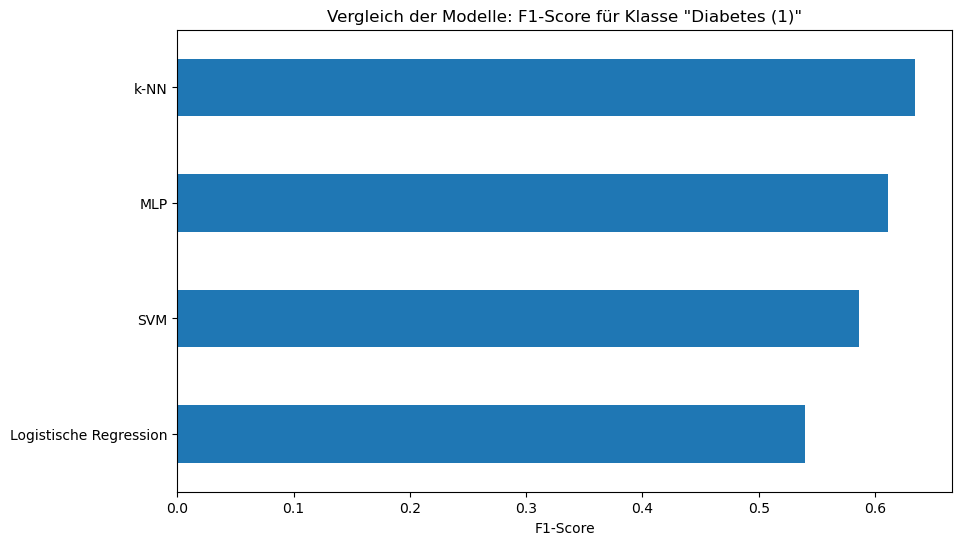

In [21]:
# Zusammenfassender Vergleich der F1-Scores (Beispiel)
print("\n--- Zusammenfassender Vergleich (Metriken für Klasse 'Diabetes (1)') ---")
# Überprüfen, ob evaluation_results nicht leer ist, bevor ein DataFrame erstellt wird
if evaluation_results:
    f1_scores_summary = pd.DataFrame.from_dict(evaluation_results, orient='index')
    # Sicherstellen, dass die Spalten existieren, bevor darauf zugegriffen wird
    columns_to_display = ['f1_score_1', 'accuracy', 'precision_1', 'recall_1']
    existing_columns = [col for col in columns_to_display if col in f1_scores_summary.columns]
    
    if existing_columns:
        print(f1_scores_summary[existing_columns].sort_values(by='f1_score_1', ascending=False))

        # Optional: Barplot für den Vergleich, nur wenn 'f1_score_1' existiert
        if 'f1_score_1' in f1_scores_summary.columns:
            f1_scores_summary['f1_score_1'].sort_values().plot(kind='barh', figsize=(10,6))
            plt.title('Vergleich der Modelle: F1-Score für Klasse "Diabetes (1)"')
            plt.xlabel('F1-Score')
            plt.show()
        else:
            print("\nWarnung: Spalte 'f1_score_1' nicht in den Ergebnissen gefunden, Barplot wird übersprungen.")
    else:
        print("\nWarnung: Keine der erwarteten Metrik-Spalten in den Ergebnissen gefunden.")
else:
    print("\nWarnung: Keine Evaluationsergebnisse zum Anzeigen vorhanden.")

## 6. Diskussion der Ergebnisse und nächste Schritte

**d) Vergleich der Klassifikatoren anhand geeigneter Metriken**

Basierend auf den Ergebnissen aus dem Notebook gestaltet sich der Vergleich der Klassifikatoren wie folgt, wobei der Fokus auf der Erkennung von Diabetes (Klasse "Diabetes (1)") liegt:

- **Gesamt-Accuracy:** k-NN (0.753) und SVM (0.734) zeigen die höchste Gesamtgenauigkeit, gefolgt von MLP (0.727) und der Logistischen Regression (0.701).

- **Precision für "Diabetes (1)":** k-NN (0.660) und SVM (0.644) haben die höchste Präzision, was bedeutet, dass wenn diese Modelle Diabetes vorhersagen, dies mit höherer Wahrscheinlichkeit korrekt ist als bei MLP (0.611) und Logistischer Regression (0.587).

- **Recall für "Diabetes (1)":** k-NN und MLP (beide 0.611) erkennen den höchsten Anteil der tatsächlichen Diabetes-Fälle. SVM (0.537) und insbesondere die Logistische Regression (0.500) übersehen hier mehr Fälle. Dies ist oft eine sehr kritische Metrik in medizinischen Anwendungen.

- **F1-Score für "Diabetes (1)":** Der k-NN Klassifikator erzielt mit 0.635 den höchsten F1-Score, was auf die beste Balance zwischen Precision und Recall für die Diabetes-Klasse hindeutet. Es folgen MLP (0.611), SVM (0.586) und die Logistische Regression (0.540).

Zusammenfassend lässt sich sagen, dass der k-NN-Klassifikator in diesem spezifischen Durchlauf die robusteste Leistung für die Erkennung von Diabetes gezeigt hat, insbesondere wenn man den F1-Score und den Recall betrachtet. Die Logistische Regression schneidet in fast allen relevanten Metriken für die Diabetes-Klasse am schwächsten ab.

Das Notebook erstellt zudem eine zusammenfassende Tabelle und einen horizontalen Barplot, der die Modelle basierend auf ihrem F1-Score für die Klasse "Diabetes (1)" vergleicht und diese Rangfolge visuell bestätigt.

**e) Diskussion der Ergebnisse und Einordnung der Praxistauglichkeit**

**Diskussion der Ergebnisse:**
Die erzielten Ergebnisse zeigen, dass die Modelle eine moderate Fähigkeit zur Diabetes-Vorhersage aufweisen. Der beste F1-Score für die Klasse "Diabetes (1)" liegt bei ca. 0.635 (k-NN), während der Recall für diese Klasse bei maximal ca. 0.611 (k-NN und MLP) liegt. Das bedeutet, dass etwa 61% der tatsächlichen Diabetes-Fälle korrekt erkannt wurden, während die übrigen ca. 39% übersehen wurden (False Negatives). Die Precision von ca. 0.66 (k-NN) für die Diabetes-Klasse zeigt, dass von den als Diabetes klassifizierten Fällen etwa zwei Drittel tatsächlich Diabetes hatten.

- **Vergleich:** Der k-NN-Klassifikator bietet die beste Balance aus Precision und Recall für die Diabetes-Klasse. Die Logistische Regression zeigt die schwächste Leistung in Bezug auf die Erkennung von Diabetes.

- **Fehlerarten:** Ein Recall von etwa 0.61 bedeutet eine signifikante Anzahl von False Negatives (übersehene Diabetesfälle), was im medizinischen Kontext kritisch ist.

- **Limitationen:**

    - **Datensatz:** Der Pima Indians Diabetes Datensatz ist spezifisch für eine bestimmte Population und relativ klein. Die Generalisierbarkeit auf andere ethnische Gruppen oder Populationen ist fraglich.

    - **Fehlende Werte:** Die Imputation mit dem Median ist eine einfache Methode. Komplexere Imputationsverfahren könnten die Ergebnisse verbessern.

    - **Hyperparameter:** Die Modelle wurden mit Standard-Hyperparametern oder nur geringfügigen Anpassungen trainiert. Eine systematische Hyperparameter-Optimierung fehlt und könnte die Leistung signifikant steigern.

    - **Feature Engineering/Selektion:** Es wurde kein fortgeschrittenes Feature Engineering oder eine systematische Feature-Selektion durchgeführt.

**Einordnung der Praxistauglichkeit:**

Die im Notebook entwickelten Modelle mit den aktuell erzielten Leistungswerten (z.B. F1-Score ~0.54-0.64, Recall ~0.50-0.61 für Diabetes) sind in dieser Form nicht für den direkten klinischen Praxiseinsatz geeignet.

- **Leistung:** Die Werte für Recall und F1-Score sind für eine zuverlässige klinische Anwendung zu niedrig. Ein Recall von 0.61 würde bedeuten, dass fast 40% der Diabetesfälle unentdeckt blieben, was inakzeptabel hohe Risiken birgt. Für klinische Screening-Tests werden oft Recall-Werte von über 90% oder sogar 95% angestrebt. Auch der F1-Score sollte idealerweise deutlich höher liegen (oft >0.8 oder >0.9, je nach Anwendung und Risikobewertung).

- **Generalisierbarkeit:** Die Modelle müssten auf breiteren, diverseren Datensätzen validiert werden.

- **Robustheit und Validierung:** Umfangreiche Tests, Kreuzvalidierung und idealerweise prospektive Studien wären notwendig.

- **Interpretierbarkeit:** Für manche Anwendungen ist die Interpretierbarkeit des Modells wichtig.

- **Kosten-Nutzen-Abwägung von Fehlern:** Die Konsequenzen von Fehlklassifikationen müssen im klinischen Kontext genau abgewogen werden. Die aktuellen Modelle würden zu viele False Negatives produzieren.

Die "Möglichen nächsten Schritte", die im Notebook am Ende aufgeführt sind (Hyperparameter-Optimierung, fortgeschrittenere Imputation, andere Algorithmen, etc.), sind essentiell, um die Modelle signifikant zu verbessern und ihre Leistung in einen Bereich zu bringen, der eine Diskussion über Praxistauglichkeit überhaupt erst ermöglicht. Ein direkt einsetzbares medizinisches Diagnosewerkzeug erfordert einen weitaus rigoroseren Entwicklungs-, Validierungs- und Zulassungsprozess sowie deutlich höhere Leistungsmetriken.



### Analyse der Ergebnisse:
- **Vergleich der Metriken:**
    - **Accuracy:** Gibt den Gesamtanteil der korrekten Klassifikationen an. Kann irreführend sein, wenn die Klassen unausgewogen sind.
    - **Precision (für Klasse "Diabetes"):** Von allen als "Diabetes" vorhergesagten Fällen, wie viele waren tatsächlich Diabetes? (TP / (TP + FP)). Wichtig, wenn die Kosten eines False Positive hoch sind.
    - **Recall (Sensitivität, für Klasse "Diabetes"):** Von allen tatsächlichen Diabetes-Fällen, wie viele wurden korrekt als solche erkannt? (TP / (TP + FN)). Sehr wichtig im medizinischen Kontext, um möglichst wenige Kranke zu übersehen (Minimierung von False Negatives).
    - **F1-Score (für Klasse "Diabetes"):** Harmonisches Mittel aus Precision und Recall. Ein guter Gesamtindikator für die Leistung bei einer bestimmten Klasse.
- **Welches Modell schneidet am besten ab?** Basierend auf den Metriken (insbesondere Recall und F1-Score für die Klasse "Diabetes"), welches Modell scheint am vielversprechendsten? Gibt es signifikante Unterschiede?
- **Interpretation der Konfusionsmatrix:**
    - True Positives (TP): Korrekt als Diabetes klassifiziert.
    - True Negatives (TN): Korrekt als kein Diabetes klassifiziert.
    - False Positives (FP): Fälschlicherweise als Diabetes klassifiziert (Typ-I-Fehler).
    - False Negatives (FN): Fälschlicherweise als kein Diabetes klassifiziert (Typ-II-Fehler). Im medizinischen Kontext oft der kritischste Fehler.

### Eignung der Modelle für die Vorhersage von Diabetes:
- Abhängig von den Zielen: Wenn das Ziel ist, möglichst wenige Diabetes-Fälle zu übersehen, ist ein Modell mit hohem Recall für die Klasse "Diabetes" zu bevorzugen, auch wenn dies möglicherweise zu mehr False Positives führt.
- Die "Kosten" verschiedener Fehlklassifikationen müssen berücksichtigt werden.

### Limitationen:
- **Datensatz:**
    - Der Pima Indians Diabetes Datensatz ist relativ klein.
    - Er bezieht sich auf eine spezifische Population (Pima-Indianerinnen), daher ist die Generalisierbarkeit auf andere Populationen möglicherweise eingeschränkt.
    - Die ursprüngliche Bedeutung der Nullwerte (z.B. für `Insulin` oder `SkinThickness`) ist nicht immer eindeutig und die Imputation ist eine Annäherung.
- **Methoden:**
    - **Einfache Imputation:** Median-Imputation ist eine einfache Methode; komplexere Methoden (z.B. k-NN Imputation, MICE) könnten bessere Ergebnisse liefern.
    - **Keine Hyperparameter-Optimierung:** Die Modelle wurden mit Standardparametern oder einfachen Annahmen trainiert. Eine systematische Hyperparameter-Optimierung (z.B. mit `GridSearchCV` oder `RandomizedSearchCV`) könnte die Leistung deutlich verbessern.
    - **Feature Engineering / Auswahl:** Es wurde kein fortgeschrittenes Feature Engineering oder eine systematische Feature-Auswahl durchgeführt.

### Mögliche nächste Schritte:
1.  **Hyperparameter-Optimierung:** Für jedes Modell die optimalen Hyperparameter finden.
    ```python
    # Beispiel für GridSearchCV mit Logistic Regression (Auszug)
    # from sklearn.model_selection import GridSearchCV
    # param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']}
    # grid_lr = GridSearchCV(LogisticRegression(max_iter=2000, random_state=42), param_grid_lr, cv=5, scoring='recall') # Scoring anpassen!
    # grid_lr.fit(X_train, y_train)
    # print(f"Beste Parameter für LR: {grid_lr.best_params_}")
    # best_lr_model = grid_lr.best_estimator_
    ```
2.  **Fortgeschrittenere Imputationsmethoden:** z.B. `IterativeImputer` (MICE) oder `KNNImputer` aus `sklearn.impute`.
3.  **Feature Engineering:** Erstellen neuer Merkmale aus den vorhandenen (z.B. Verhältnisse, Polynome).
4.  **Feature Selektion:** Auswahl der relevantesten Merkmale (z.B. mit `SelectKBest` oder rekursiver Merkmalseliminierung).
5.  **Umgang mit unausgewogenen Klassen (falls ausgeprägt):** Obwohl `stratify` hilft, könnten Techniken wie SMOTE (Over-sampling der Minderheitsklasse) oder Anpassung der Klassengewichte (`class_weight='balanced'` in vielen Modellen) untersucht werden, wenn die Klassenverteilung ein Problem darstellt. (Im Pima-Datensatz ist die Unausgewogenheit moderat).
6.  **Ausprobieren anderer Algorithmen:** z.B. Random Forest, Gradient Boosting (XGBoost, LightGBM, CatBoost), die oft sehr gute Ergebnisse liefern.
7.  **Fehleranalyse:** Genauere Untersuchung der Fälle, die von den besten Modellen falsch klassifiziert wurden, um Muster oder Gründe zu erkennen.
8.  **Kreuzvalidierung:** Eine robustere Evaluation der Modellleistung durchführen, anstatt eines einzelnen Train-Test-Splits (obwohl `GridSearchCV` dies intern bereits tut).